In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D,Activation,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import torchvision.transforms as transforms
from tensorflow.keras.regularizers import l2

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
len(X_train)

50000

In [ ]:
len(y_test)

10000

In [ ]:
# X_train=X_train.reshape(50000,32,32,3)
# X_test=X_test.reshape(10000,32,32,3)

In [ ]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

In [ ]:
test_datagen= ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)

In [ ]:
model=Sequential()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2,2)))
# Flatten
model.add(Flatten())

#Fully Connected Layer 1
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# # Fully Connected Layer 2
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model = Sequential([
    # Conv Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # FC Block
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.2219 - loss: 3.2068 - val_accuracy: 0.1096 - val_loss: 3.3386
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4136 - loss: 2.1576 - val_accuracy: 0.5379 - val_loss: 1.8171
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5346 - loss: 1.7262 - val_accuracy: 0.5594 - val_loss: 1.6597
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6185 - loss: 1.4855 - val_accuracy: 0.5911 - val_loss: 1.6216
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6752 - loss: 1.3737 - val_accuracy: 0.6461 - val_loss: 1.5386
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7188 - loss: 1.3042 - val_accuracy: 0.7047 - val_loss: 1.3921
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7445 - loss: 1.2620 - val_accuracy: 0.7091 - val_loss: 1.3895
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7729 - loss: 1.2291 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7214


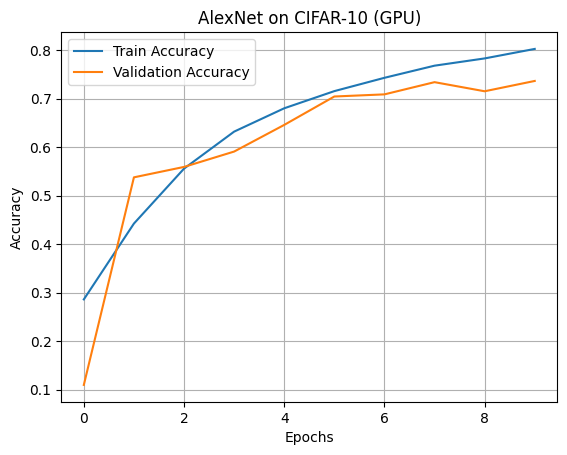

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet on CIFAR-10 (GPU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Load base DenseNet model
base_model = DenseNet121(include_top=False, weights=None, input_shape=(32, 32, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile and train
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 306s 189ms/step - accuracy: 0.3821 - loss: 1.7012 - val_accuracy: 0.4275 - val_loss: 1.7294
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 49ms/step - accuracy: 0.6099 - loss: 1.0972 - val_accuracy: 0.4297 - val_loss: 2.1329
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6948 - loss: 0.8716 - val_accuracy: 0.5553 - val_loss: 1.4375
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7467 - loss: 0.7243 - val_accuracy: 0.5172 - val_loss: 1.8118
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.7868 - loss: 0.6149 - val_accuracy: 0.7087 - val_loss: 0.8508
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8132 - loss: 0.5358 - val_accuracy: 0.7211 - val_loss: 0.8270
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.8442 - loss: 0.4510 - val_accuracy: 0.7116 - val_loss: 0.8659
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8689 - loss: 0.3792 

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9231 - loss: 0.2213 - val_accuracy: 0.7385 - val_loss: 0.9281
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9334 - loss: 0.1982 - val_accuracy: 0.7150 - val_loss: 1.1294
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9463 - loss: 0.1587 - val_accuracy: 0.7265 - val_loss: 1.1062
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9490 - loss: 0.1425 - val_accuracy: 0.7464 - val_loss: 1.0020
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9565 - loss: 0.1282 - val_accuracy: 0.7200 - val_loss: 1.2414
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9585 - loss: 0.1175 - val_accuracy: 0.6987 - val_loss: 1.3601
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9621 - loss: 0.1086 - val_accuracy: 0.7136 - val_loss: 1.3320
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9670 - loss: 0.0938 - 

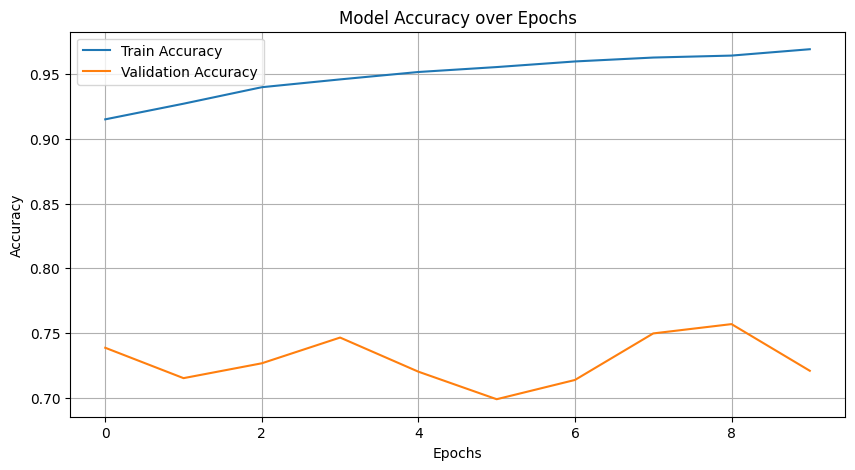

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()